## Intro:

In this notebok we are going to  explore and example of a PyTorch end-to-end workflow. 

For reference: https://www.learnpytorch.io/01_pytorch_workflow/

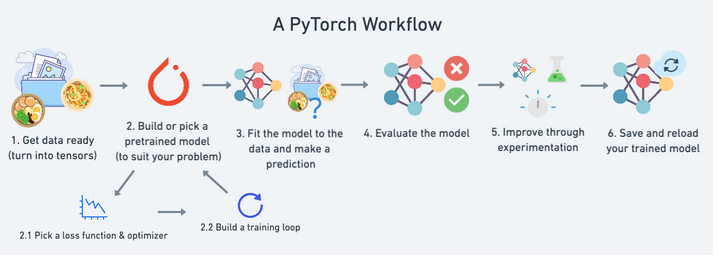

In [14]:

from IPython.display import Image, display

display(Image(filename='imgs/workflow.png', width=700))

In [ ]:
import torch
from torch import nn # contains all pytorch building blocks for neural networks
import matplotlib.pyplot as plt


# check pytorch version
torch.__version__

'2.7.1+cu126'

## Prepare and load data

It can be excel spreadsheets, images of any kind, videos, audo, DNA, text...

In this notebook we are going to create some data. We'll use linear regression to create it with known parameters (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using gradient descent.

Remember that linear Regression is define by a line as --> y = m*x + b where m is weights and b is bias

In [16]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Split data into train and test

In [ ]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualize the data 

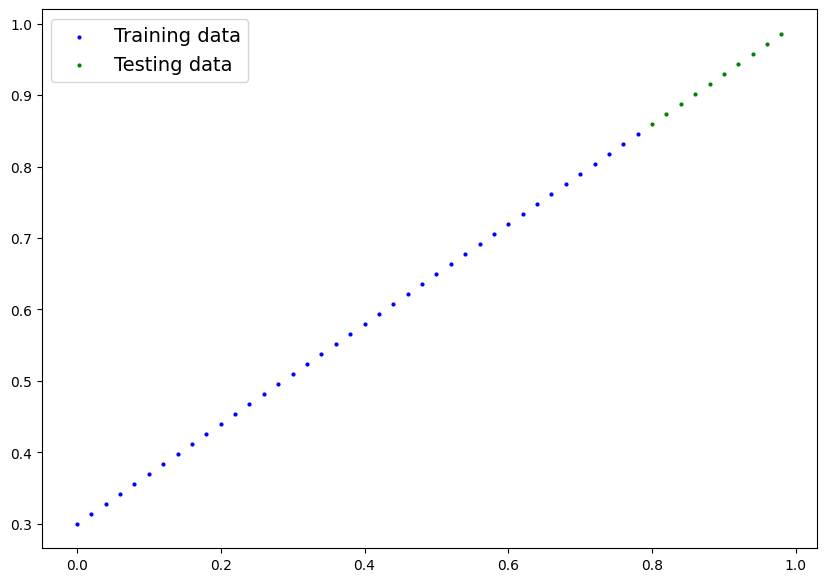

In [19]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})
  plt.show()

plot_predictions()

## Build a model

nn.Module is the **Base class** for all neural network modules. Link -> https://docs.pytorch.org/docs/stable/generated/torch.nn.Module.html

Your models should also subclass this class.

Modules can also contain other Modules, allowing them to be nested in a tree structure. 

In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)


The model will start with random values for weight and bias and slowly adjust them after every iteration until it gets to the most optimal prediction that represents the line above.

How does it do? Through 2 algorithms
1. Gradient Descent is an optimization algorithm that updates model parameters (like weights) by moving them in the direction that reduces the error (loss), using the gradient (slope) of the loss function. (requires_grad = True)

2. Backpropagation is the method used to compute those gradients efficiently by applying the chain rule of calculus, starting from the output layer and moving backward through the network.

## Fit the model to the data

## Make predictions and evaluating a model (inference)

## Save and loading a model

## Putting it all together